In [2]:
import numpy as np
import math
import pandas as pd
import statsmodels.formula.api as smf
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [3]:

df_std0 = pd.read_feather("/maps/forecol/data/Overlays/monte_carlo/results/std0/master_summary_allyears.feather")
df_std1 = pd.read_feather("/maps/forecol/data/Overlays/monte_carlo/results/std1/master_summary_allyears.feather")
df_nonan = pd.read_feather("/maps/forecol/data/Overlays/monte_carlo/results/nonan/master_summary_allyears.feather")
print(df_std0.columns)
dfs = {
    'Highest filtering': df_std0, 
    'High filtering': df_std1, 
    'Medium filtering': df_nonan
}

Index(['min', 'max', 'p75', 'median', 'p25', 'mean', 'std', 'var',
       'mode_counts', 'mode_vals', 'shot_number', 'absolute_time',
       'lon_lowestmode', 'lat_lowestmode', 'agbd', 'agbd_pi_lower',
       'agbd_pi_upper', 'agbd_se', 'l2_quality_flag', 'l4_quality_flag',
       'degrade_flag', 'beam_type', 'sensitivity', 'geometry'],
      dtype='object')


/tmp/ipykernel_4169700/3572775123.py:5: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']]
/tmp/ipykernel_4169700/3572775123.py:5: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']]
/tmp/ipykernel_4169700/3572775123.py:5: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']]


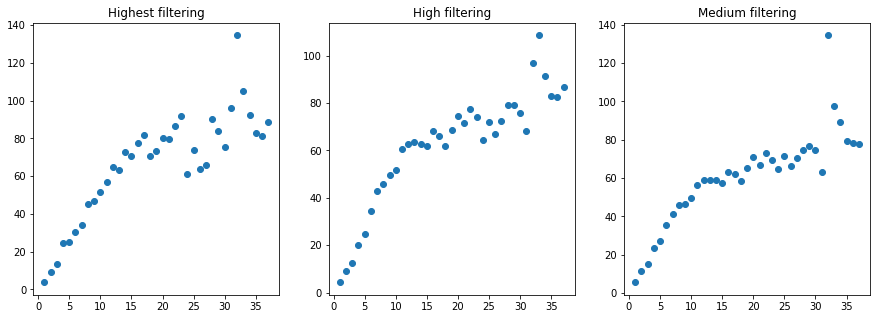

In [4]:
fig, ax = plt.subplots(ncols=len(dfs), figsize=(len(dfs) * 5,5))

for i, item in enumerate(dfs.items()):
    name, df = item
    medians = df.groupby('mode_vals').agg(['median'])[['agbd']]
    ax[i].scatter(medians.index, medians['agbd'])
    ax[i].set_title(name)

/tmp/ipykernel_4169700/1551979125.py:6: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')


Intercept    11.395241
mode_vals     1.038546
dtype: float64
Intercept    11.469971
mode_vals     0.932852
dtype: float64
Intercept    11.090418
mode_vals     0.913415
dtype: float64


/tmp/ipykernel_4169700/1551979125.py:6: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')
/tmp/ipykernel_4169700/1551979125.py:6: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')


Text(0.5, 0.98, 'OLS')

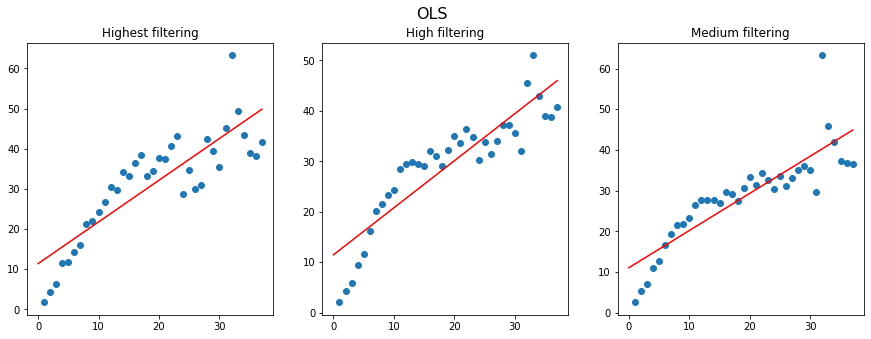

In [5]:
# OLS
fig, ax = plt.subplots(ncols=len(dfs), figsize=(len(dfs) * 5,5))

for i, item in enumerate(dfs.items()):
    name, df = item
    medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')
    medians['agcd'] = medians['agbd'] * 0.47
    ols = smf.ols('agcd ~ mode_vals', medians).fit()
    ax[i].scatter(medians['mode_vals'], medians['agcd'])
    maxage = medians.mode_vals.max()
    print(ols.params)
    ax[i].plot((0, maxage), (ols.params["Intercept"], ols.params["Intercept"] + maxage * ols.params['mode_vals']), color='red')
    ax[i].set_title(name)
fig.suptitle("OLS", fontsize=16)

/tmp/ipykernel_4169700/520081349.py:8: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')
/tmp/ipykernel_4169700/520081349.py:2: RuntimeWarning: divide by zero encountered in log
  return a + b * np.log(xs)
/tmp/ipykernel_4169700/520081349.py:8: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')
/tmp/ipykernel_4169700/520081349.py:2: RuntimeWarning: divide by zero encountered in log
  return a + b * np.log(xs)


Intercept            -5.940858
np.log(mode_vals)    13.807765
dtype: float64
Intercept            -4.144830
np.log(mode_vals)    12.418554
dtype: float64
Intercept            -3.468267
np.log(mode_vals)    11.887595
dtype: float64


/tmp/ipykernel_4169700/520081349.py:8: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')
/tmp/ipykernel_4169700/520081349.py:2: RuntimeWarning: divide by zero encountered in log
  return a + b * np.log(xs)


Text(0.5, 0.98, 'LOG: (a + b ln(x))')

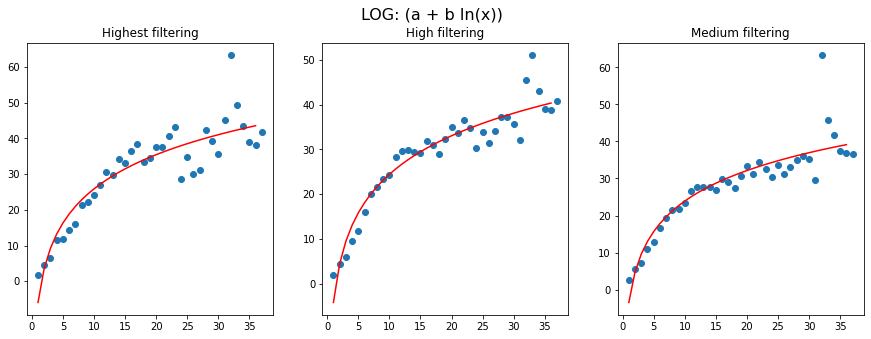

In [6]:
def log_fun(a, b, xs):
    return a + b * np.log(xs)

fig, ax = plt.subplots(ncols=len(dfs), figsize=(len(dfs) * 5,5))

for i, item in enumerate(dfs.items()):
    name, df = item
    medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')
    medians['agcd'] = medians['agbd'] * 0.47
    ols = smf.ols('agcd ~ np.log(mode_vals)', medians).fit()
    ax[i].scatter(medians['mode_vals'], medians['agcd'])
    maxage = medians.mode_vals.max()
    print(ols.params)
    xs = np.arange(0, maxage)
    ax[i].plot(xs, log_fun(ols.params["Intercept"], ols.params["np.log(mode_vals)"], xs), color="red")
    ax[i].set_title(name)
fig.suptitle("LOG: (a + b ln(x))", fontsize=16)

In [36]:
# Get set up with R + python
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector, ListVector
from rpy2.robjects import pandas2ri

_SEGMENTED_PACKAGE = "segmented"
_STATS_PACKAGE = "stats"

def _import_package(name):
    utils = rpackages.importr("utils")
    utils.chooseCRANmirror(ind=1)
    if not rpackages.isinstalled(name):
        utils.install_packages(StrVector([name]))
        print("installed!")
    return rpackages.importr(name)

_segmented = _import_package(_SEGMENTED_PACKAGE)
_stats = _import_package(_STATS_PACKAGE)



/tmp/ipykernel_4169700/2429175965.py:20: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  test_medians = dfs['Highest filtering'].groupby('mode_vals').agg(['median'])[['agbd']].reset_index()


In [78]:
test_medians = dfs['Highest filtering'].groupby("mode_vals")["agbd"].median().reset_index()
test_medians['agcd'] = test_medians['agbd'] * 0.47
print(test_medians)
pandas2ri.activate()

r_model = _stats.nls(formula="agcd~a*(1-exp(-c*mode_vals))", data=test_medians, start=ListVector({"a": 47, "c": 0.07}))

print(r_model.rx2("m"))


    mode_vals        agbd       agcd
0         1.0    3.722955   1.749789
1         2.0    9.449809   4.441410
2         3.0   13.605889   6.394768
3         4.0   24.807000  11.659290
4         5.0   24.875078  11.691287
..        ...         ...        ...
32       33.0  105.190353  49.439466
33       34.0   92.420593  43.437679
34       35.0   82.778908  38.906087
35       36.0   81.097816  38.115974
36       37.0   88.820526  41.745647

[37 rows x 3 columns]
$resid
function () 
resid
<bytecode: 0x556ad5302c78>
<environment: 0x556ade1748e8>

$fitted
function () 
rhs
<bytecode: 0x556ad5302dc8>
<environment: 0x556ade1748e8>

$formula
function () 
form
<bytecode: 0x556ad5302f18>
<environment: 0x556ade1748e8>

$deviance
function () 
dev
<bytecode: 0x556ad5303068>
<environment: 0x556ade1748e8>

$lhs
function () 
lhs
<bytecode: 0x556ad5317108>
<environment: 0x556ade1748e8>

$gradient
function () 
.swts * attr(rhs, "gradient")
<bytecode: 0x556ad5317258>
<environment: 0x556ade1748e8>

$conv

/tmp/ipykernel_2805431/567128802.py:9: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')
/tmp/ipykernel_2805431/567128802.py:9: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')
/tmp/ipykernel_2805431/567128802.py:9: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')


Text(0.5, 0.98, 'EXP: a * (1 - e^(-c * x))')

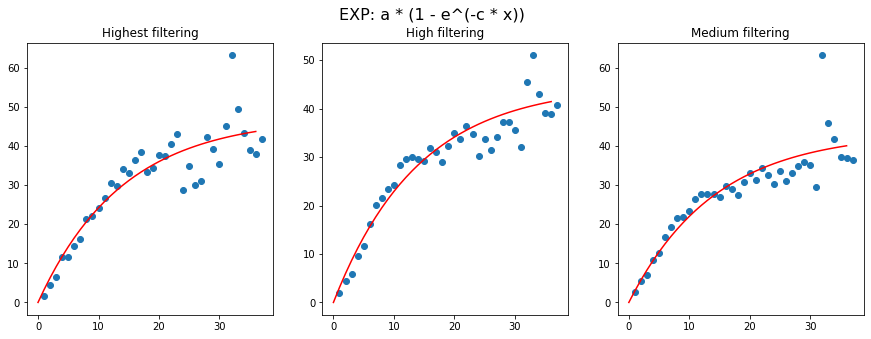

In [8]:
# exponential
def exp_fun(a, c, xs):
    return a * (1 - np.exp(-1 * c * xs ))

fig, ax = plt.subplots(ncols=len(dfs), figsize=(len(dfs) * 5,5))

for i, item in enumerate(dfs.items()):
    name, df = item
    medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')
    medians['agcd'] = medians['agbd'] * 0.47
    # Python can't actually do this, so we use R ...
    params = {
        0: [47.34300, 0.07167],
        1: [44.88927, 0.07143],
        2: [43.52441, 0.07059],
    }
    ax[i].scatter(medians['mode_vals'], medians['agcd'])
    maxage = medians.mode_vals.max()
    xs = np.arange(0, maxage)
    ax[i].plot(xs, exp_fun(params[i][0], params[i][1], xs), color="red")
    ax[i].set_title(name)
fig.suptitle("EXP: a * (1 - e^(-c * x))", fontsize=16)

/tmp/ipykernel_2805431/3977205326.py:17: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')
/tmp/ipykernel_2805431/3977205326.py:17: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')
/tmp/ipykernel_2805431/3977205326.py:17: FutureWarning: ['beam_type', 'geometry'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')


Text(0.5, 0.98, 'Piecewise regression')

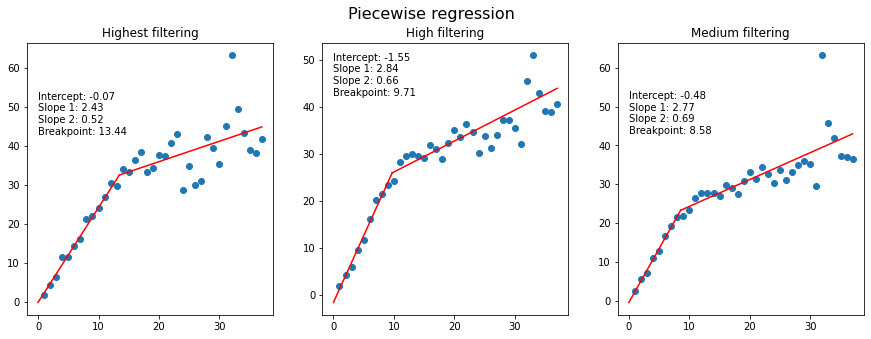

In [9]:
# segmented
def l(x1, x2, y1, slope):
    return slope * (x2 - x1) + y1
def get_lines(intercept, psi1x, mx, u1x):
    break_y = l(0, psi1x, intercept, mx)
    return [
        ((0, psi1x),  # minx, maxx for line 1
        (intercept, break_y)),          # miny, maxy for line 1
        ((psi1x, 37),
        (break_y, l(psi1x, 37, break_y, mx + u1x)))
    ]

fig, ax = plt.subplots(ncols=len(dfs), figsize=(len(dfs) * 5,5))

for i, item in enumerate(dfs.items()):
    name, df = item
    medians = df.groupby('mode_vals').agg(['median'])[['agbd']].reset_index('mode_vals')
    medians['agcd'] = medians['agbd'] * 0.47
    # Python can't actually do this, so we use R ...
    params = {
        0: [-0.06688, 13.44, 2.42826, -1.90472],
        1: [-1.551, 9.709, 2.838, -2.179],
        2: [-0.4799, 8.577, 2.7732, -2.0801],
    }
    ax[i].scatter(medians['mode_vals'], medians['agcd'])
    maxage = medians.mode_vals.max()
    xs = np.arange(0, maxage)
    l1, l2 = get_lines(*params[i])
    ax[i].plot(*l1, color='red')
    ax[i].plot(*l2, color='red')
    ax[i].set_title(name)
    text_label = (
        "Intercept: {0:.2f}\n"
        "Slope 1: {1:.2f}\n"
        "Slope 2: {2:.2f}\n"
        "Breakpoint: {3:.2f}\n").format(
            params[i][0], 
            params[i][2],
            params[i][2] + params[i][3],
            params[i][1]
        )
    ax[i].text(x=0, y=40, s=text_label)

fig.suptitle("Piecewise regression", fontsize=16)

In [ ]:
# spherical